In [1]:
import pandas as pd

In [2]:
treino = pd.read_csv('train.csv')
teste = pd.read_csv('test.csv')

In [3]:
treino.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [4]:
#verificando valores nulos
treino.isnull().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [5]:
#verificando os valores nulos como porcentagem
(treino.isnull().sum()/treino.shape[0]).sort_values(ascending=False)

PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
FireplaceQu    0.472603
                 ...   
ExterQual      0.000000
Exterior2nd    0.000000
Exterior1st    0.000000
RoofMatl       0.000000
SalePrice      0.000000
Length: 81, dtype: float64

#### Poderíamos pensar que o fato dos valores serem vazios, poderia ser uma falta de informação, mas olhando melhor, vemos que esse não é o caso:
##### PoolQC: indica a qualidade da piscina 

##### Assim como para MiscFeature, Alley, Fence

##### Essas informações, na verdade, são muito importantes e ajudarão a precificar a casa

In [7]:
#substituindo os valores vazios por -1
treino[['PoolQC','MiscFeature','Alley','Fence']] = treino[['PoolQC','MiscFeature','Alley','Fence']].fillna(-1)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

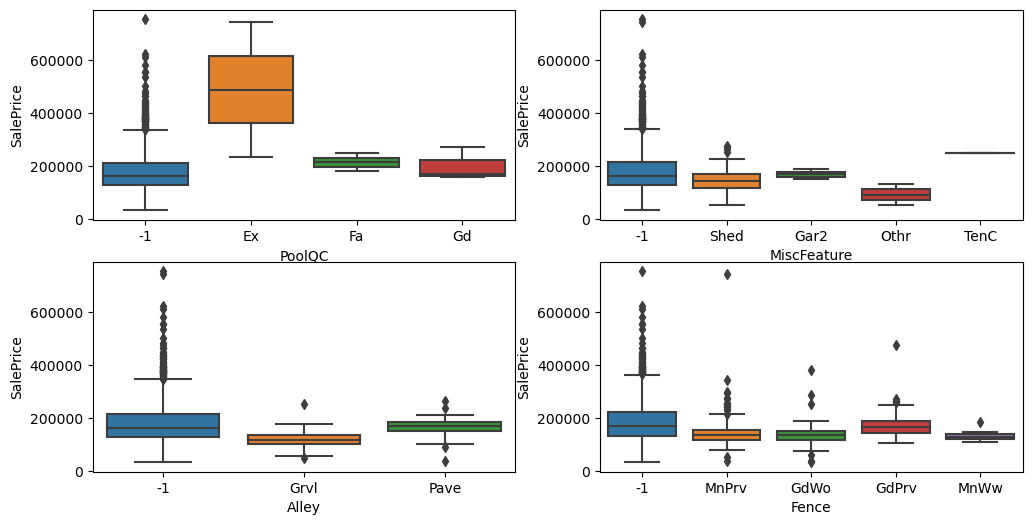

In [13]:
fig, ax = plt.subplots(ncols=2,nrows=2,figsize=(12,6))

sns.boxplot(data=treino,x = 'PoolQC',y = 'SalePrice',ax=ax[0,0])
sns.boxplot(data=treino,x = 'MiscFeature',y = 'SalePrice',ax=ax[0,1])
sns.boxplot(data=treino,x = 'Alley',y = 'SalePrice',ax=ax[1,0])
sns.boxplot(data=treino,x = 'Fence',y = 'SalePrice',ax=ax[1,1])

plt.show()